<a href="https://colab.research.google.com/github/KavinduKariyawasam/Image_Processing/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b.**

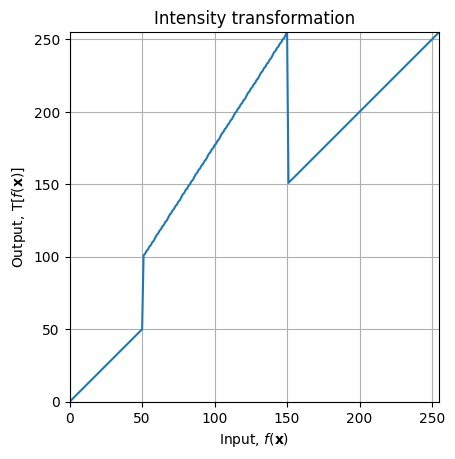

Text(0.5, 1.0, 'Transformed Image')

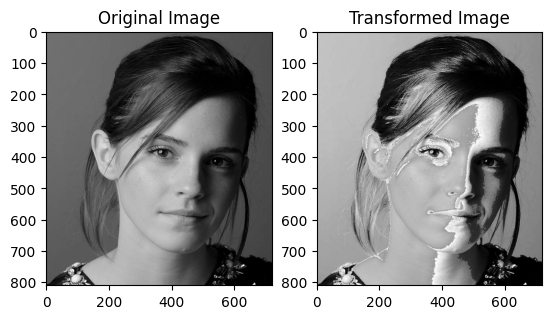

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')

t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')

t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')

t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis = 0).astype('uint8')
transform = np.concatenate((transform,t3), axis = 0).astype('uint8')
transform = np.concatenate((transform,t4), axis = 0).astype('uint8')
transform = np.concatenate((transform,t5), axis = 0).astype('uint8')

fig, ax = plt.subplots()

ax.plot(transform)
ax.set_title("Intensity transformation")
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.grid(True)
ax.set_xticks(range(0,256,50))
ax.set_yticks(range(0,256,50))

plt.show()

img = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/emma.jpg', cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img, transform)

f, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image')

ax[1].imshow(img_transformed, cmap = 'gray')
ax[1].set_title('Transformed Image')

**2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.**

Text(0.5, 1.0, 'Transformed Image')

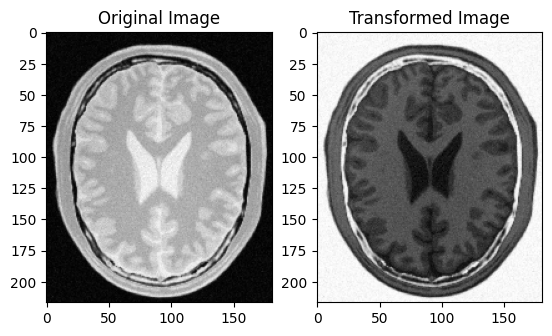

In [22]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = np.arange(255,-1, -1).astype('uint8')
# fig, ax = plt.subplots()

# ax.plot(transform)
# ax.set_title("Intensity transformation")
# ax.set_xlabel(r'Input, $f(\mathbf{x})$')
# ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
# ax.set_xlim(0,255)
# ax.set_ylim(0,255)
# ax.set_aspect('equal')
# ax.grid(True)
# ax.set_xticks(range(0,256,50))
# ax.set_yticks(range(0,256,50))

plt.show()

img = cv.imread('/content/drive/MyDrive/Image processing/Assignment1/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

img_transformed = cv.LUT(img, transform)

f, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image')

ax[1].imshow(img_transformed, cmap = 'gray')
ax[1].set_title('Transformed Image')